# Análise Exploratória dos Dados

## Setup

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from shutil import copy2

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

In [3]:
# Read file
path = "./Tidy_Entities/"
name = "p1"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')

# Transformations
df["DATE"] =  pd.to_datetime(df["DATE"], format="%Y-%m-%d")
df = df.sort_values("DATE").set_index("DATE")
df.drop(columns=["ENTIDADE"], inplace=True)
df.head(2)

,ALUMÍNIO,ARSÊNIO,BORO,BÁRIO,CHUMBO,CIANETO,COBALTO,COBRE,COLIFORMES_TERMOTOLERANTES,COR_VERDADEIRA,CROMO,CROMO_HEXAVALENTE,CÁDMIO,DBO,DQO,ESTANHO,FENOL,FERRO,FLUORETO,FÓSFORO,LÍTIO,MANGANÊS,MERCÚRIO,MOLIBDÊNIO,NITROGÊNIO,NITROGÊNIO_AMONIACAL,NITROGÊNIO_KJELDAHL,NÍQUEL,PH,PRATA,SURFACTANTES,SÓLIDOS,ÍNDICE_DE_FENÓIS,ÓLEOS
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.267,0.007,NaN,0.034,NaN,NaN,NaN,NaN,1986300.0,NaN,185.0,NaN,NaN,NaN,170.0,480.0,NaN,NaN,NaN,2.43,0.001,0.154,NaN,0.002,NaN,70.2,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,0.531,NaN,NaN,0.034,NaN,NaN,NaN,0.024,1011200.0,NaN,1050.0,0.001,NaN,NaN,280.0,734.0,NaN,0.019,0.041,2.11,0.003,0.125,0.043,0.006,NaN,73.0,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN


## Verificar Informações do Dataset

In [4]:
print(
    f"\033[31mLinhas: {df.shape[0]}\n"
    f"Colunas: {df.shape[1]}\n\n"
    f"\033[32m-> Features: \n{df.columns.tolist()}\n\n"
    f"\033[34m-> Valores ÚNICOS: \n{df.nunique()}\n\n"
    f"\033[36m-> Valores FALTANTES: \n{df.isnull().sum()}\033[0"
)

Linhas: 88
Colunas: 34

-> Features: 
['ALUMÍNIO', 'ARSÊNIO', 'BORO', 'BÁRIO', 'CHUMBO', 'CIANETO', 'COBALTO', 'COBRE', 'COLIFORMES_TERMOTOLERANTES', 'COR_VERDADEIRA', 'CROMO', 'CROMO_HEXAVALENTE', 'CÁDMIO', 'DBO', 'DQO', 'ESTANHO', 'FENOL', 'FERRO', 'FLUORETO', 'FÓSFORO', 'LÍTIO', 'MANGANÊS', 'MERCÚRIO', 'MOLIBDÊNIO', 'NITROGÊNIO', 'NITROGÊNIO_AMONIACAL', 'NITROGÊNIO_KJELDAHL', 'NÍQUEL', 'PH', 'PRATA', 'SURFACTANTES', 'SÓLIDOS', 'ÍNDICE_DE_FENÓIS', 'ÓLEOS']

-> Valores ÚNICOS: 
ALUMÍNIO                      30
ARSÊNIO                       5 
BORO                          16
BÁRIO                         25
CHUMBO                        7 
CIANETO                       6 
COBALTO                       3 
COBRE                         23
COLIFORMES_TERMOTOLERANTES    54
COR_VERDADEIRA                25
CROMO                         12
CROMO_HEXAVALENTE             7 
CÁDMIO                        4 
DBO                           71
DQO                           86
ESTANHO              

### Selecionar features com no mínimo 20% de valores válidos

In [5]:
# Remove colunas com percentual de nulos acima do limite
aux = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=["NULL_COUNT"])
null_ratio = .80
features = aux[aux["NULL_COUNT"] <= null_ratio].index.tolist()
filtered = df[features]

print(
    f"{df.shape[1] - df[features].shape[1]} colunas removidas:\n"
    f"{set(df.columns) - set(features)}\n"
)

2 colunas removidas:
{'ÍNDICE_DE_FENÓIS', 'PRATA'}



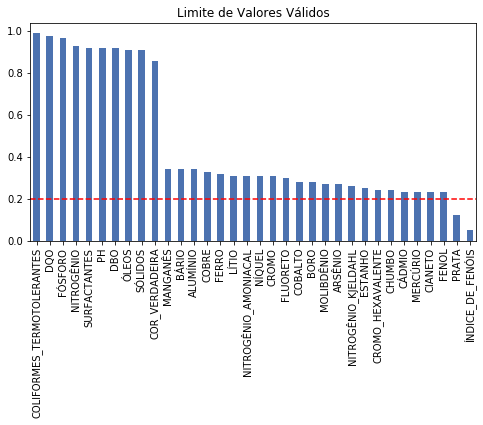

In [6]:
# Ordena os features por quantidade de nulos
percentage = (1 - df.isnull().sum() / df.shape[0]) 
percentage = pd.Series(np.around(percentage.values, 2), index=percentage.index)
percentage = percentage.sort_values(ascending=False)

# Plota o diff dos valores selecionados e excluídos
plt.figure(figsize=(5,2))
percentage.plot.bar(figsize=(8, 4))

# Insere barra horizontal no limiar dos features selecionados
plt.axhline(y=(1 - null_ratio), color="red", linewidth=1.5, linestyle="--")
plt.xticks(rotation=90)
plt.title("Limite de Valores Válidos");

### Comparar Séries Históricas

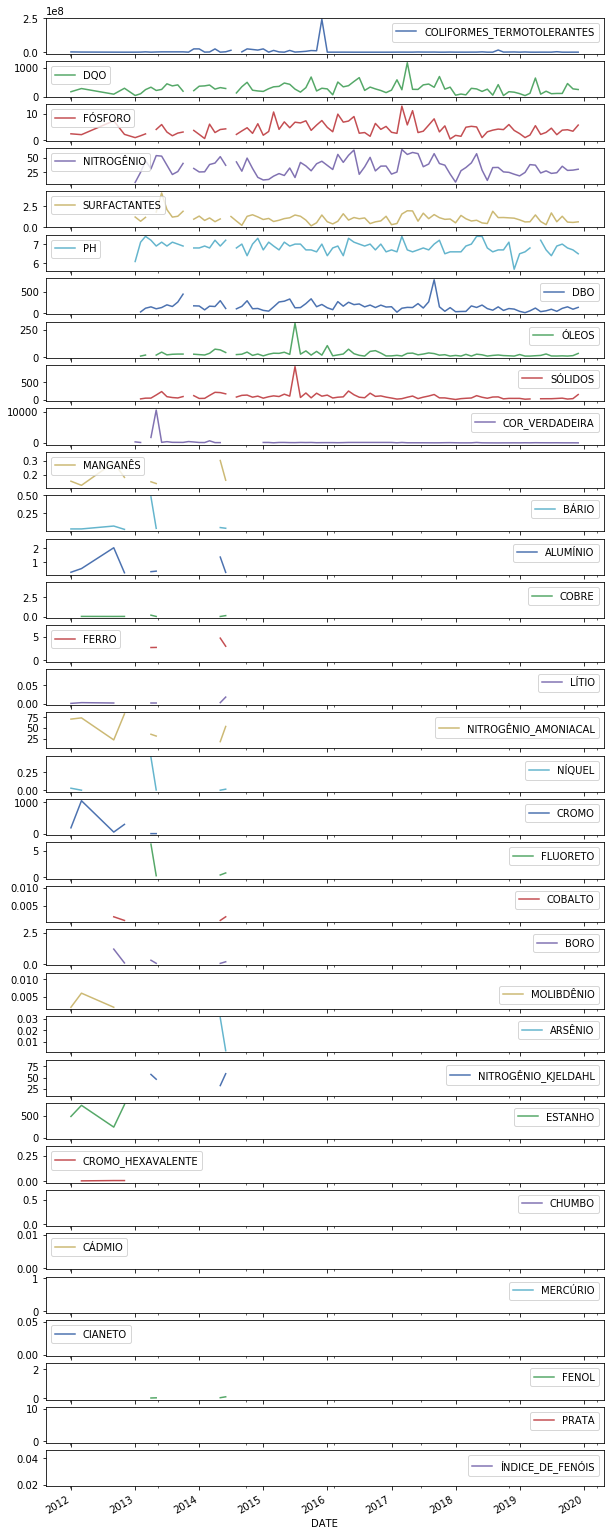

In [80]:
# Verificando valores faltantes na série histórica
df[percentage.index].plot(subplots=True, figsize=(10, 30));

### Agregando dados por média anual


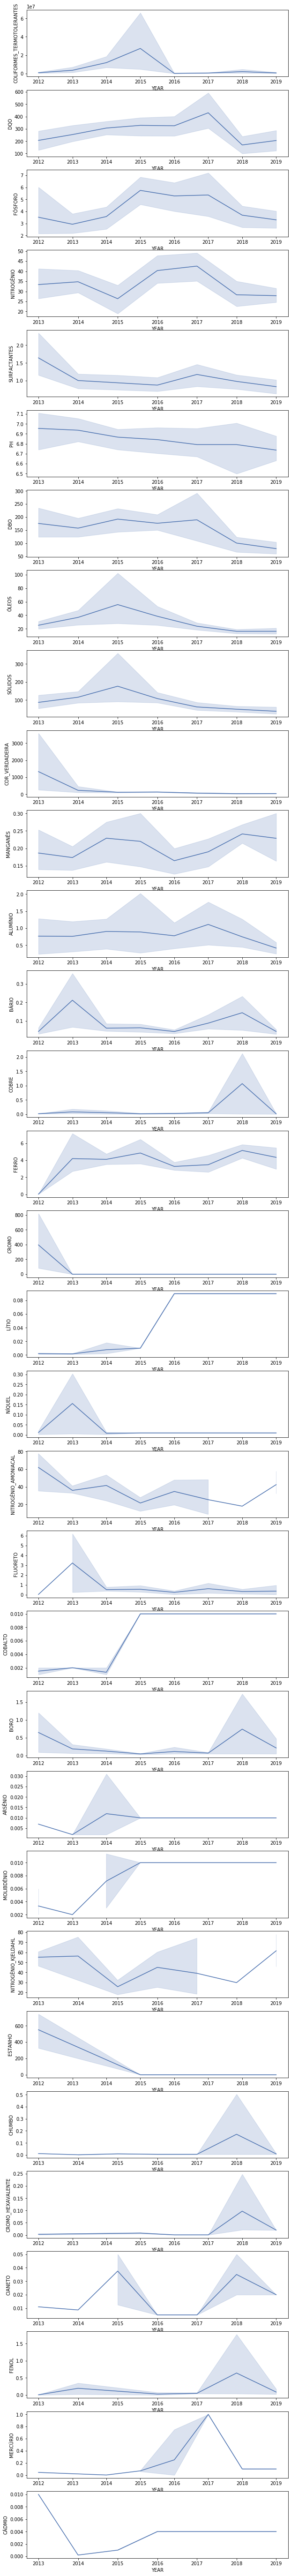

In [15]:
# Ordenando dados
ordered_columns = filtered.isnull().sum().sort_values(ascending=True).index
df_ordered = filtered[ordered_columns]
df_ordered["YEAR"] = [timestamp.year for timestamp in df_ordered.index]
cols = df_ordered.columns[:-1]

# Plotar séries históricas agregando por média anual, intervalo de confiança 95%
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(100)
plt.xlabel("")

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_ordered, 
        x="YEAR", 
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

### Plotar séries históricas agregando por média anual, intervalo de confiança 95%


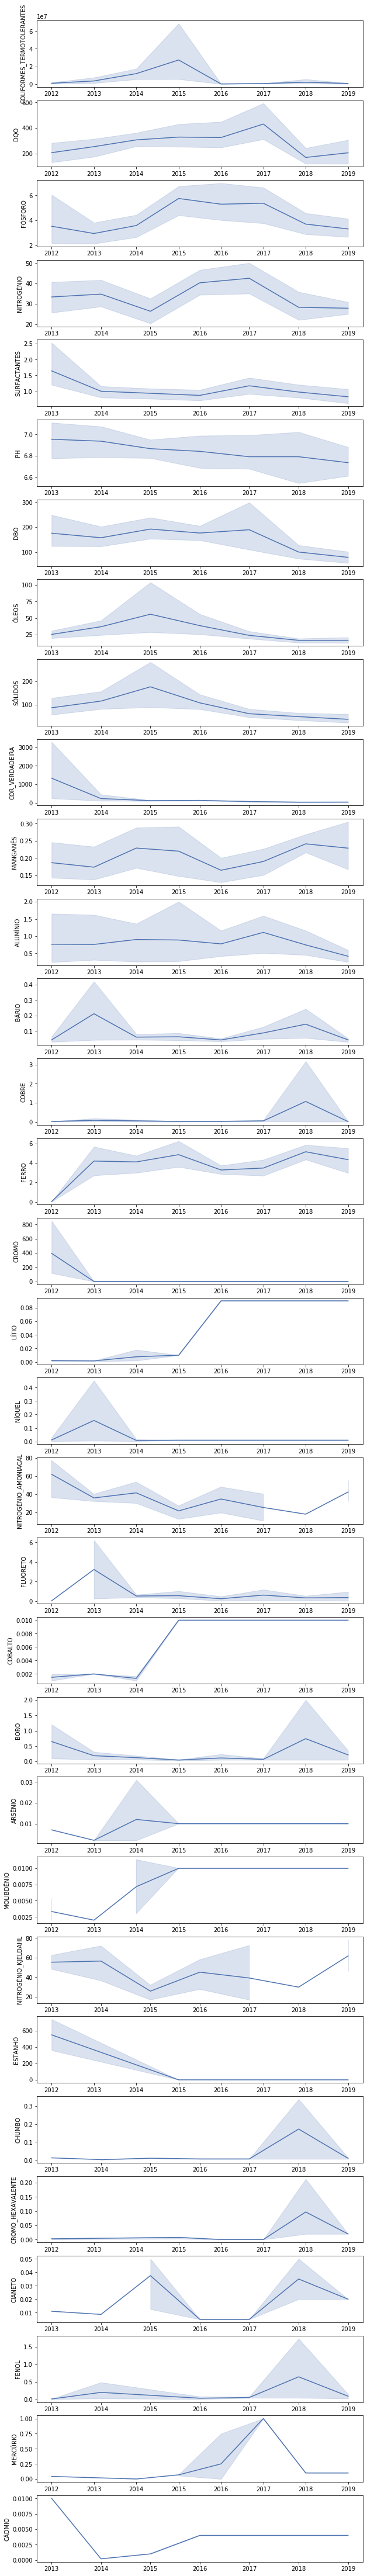

In [18]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(80)

for key, col in enumerate(cols):
    g = sns.lineplot(
        data=df_ordered, 
        x="YEAR", 
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    )
    g.set_xlabel("");

### Boxplot dos dados agregados por ano


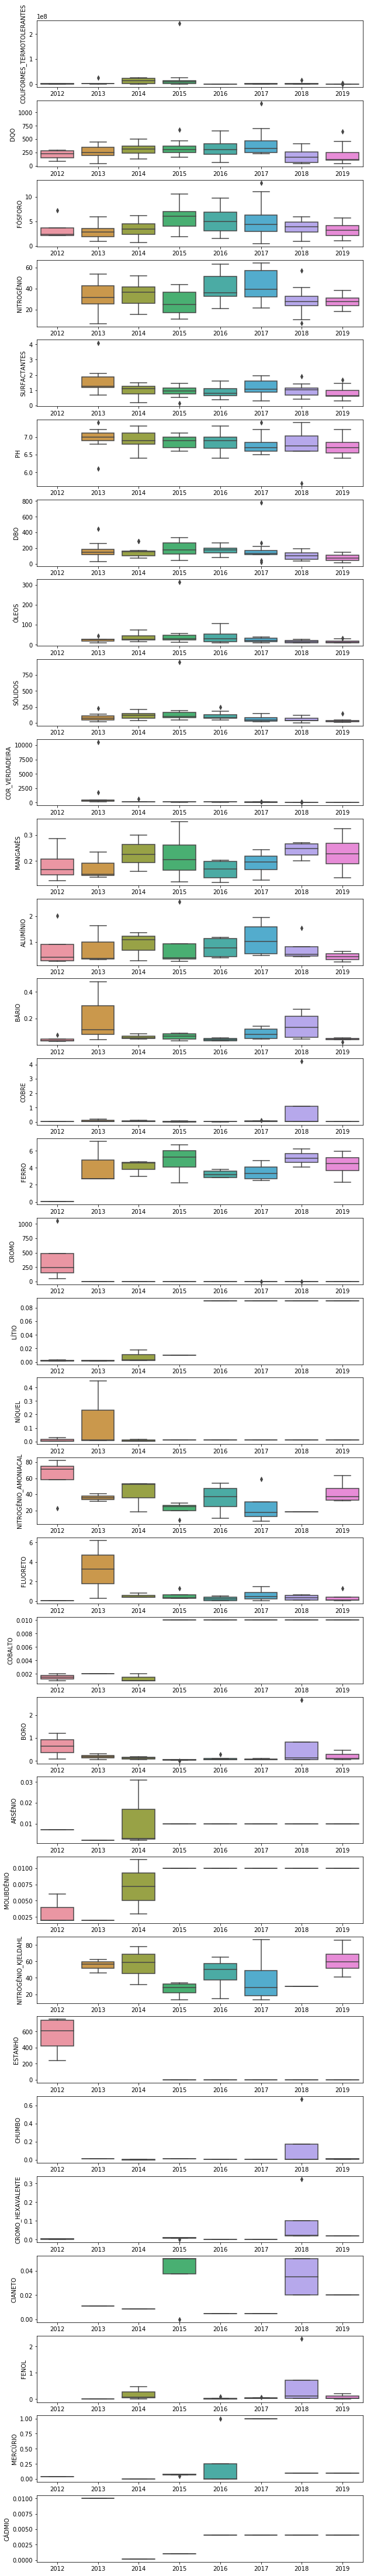

In [19]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(80)

for key, col in enumerate(cols):
    g = sns.boxplot(
        data=df_ordered, 
        x="YEAR", 
        y=col,  
        ax=axs[key]
    )
    g.set_xlabel("");

## Verificando a Distribuição dos Valores

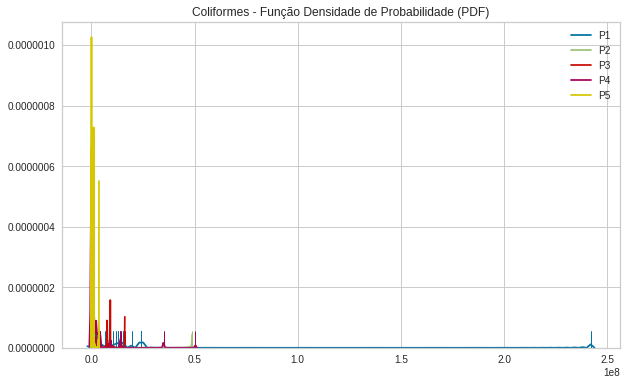

In [30]:
entity_names = df.ENTIDADE.unique().tolist()
entities = [df.loc[df['ENTIDADE'] == entity_name] for entity_name in entity_names]

for entity in entities:
    sns.distplot(entity[[name]].dropna(), hist=False, rug=True, label=str(entity['ENTIDADE'].unique()[0]))
plt.title(f"{name.capitalize()} - Função Densidade de Probabilidade (PDF)");

## Série Histórica

<Figure size 1080x576 with 0 Axes>

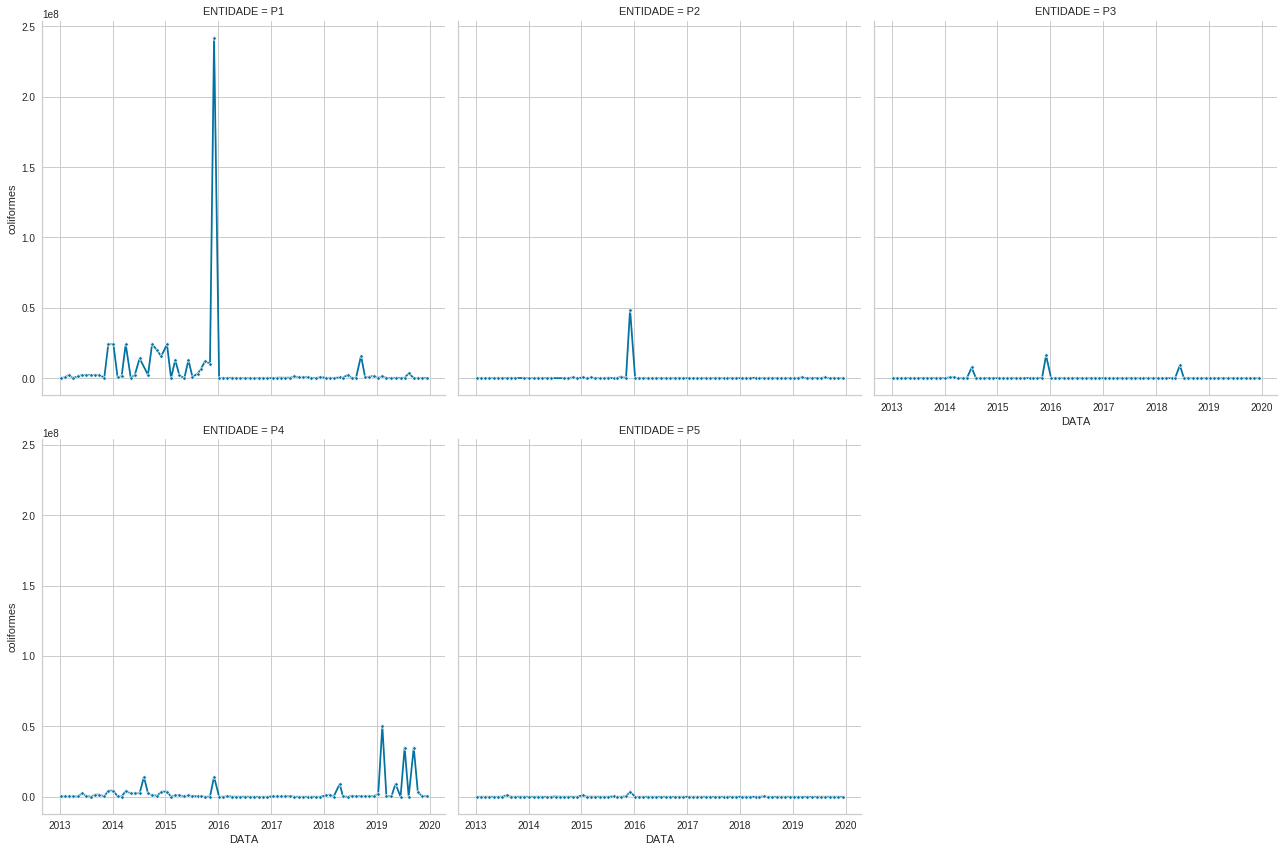

In [31]:
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True)
g = g.map(sns.lineplot, "DATA", name, marker=".", palette="Set2")
plt.show();
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)

## Localizando outliers

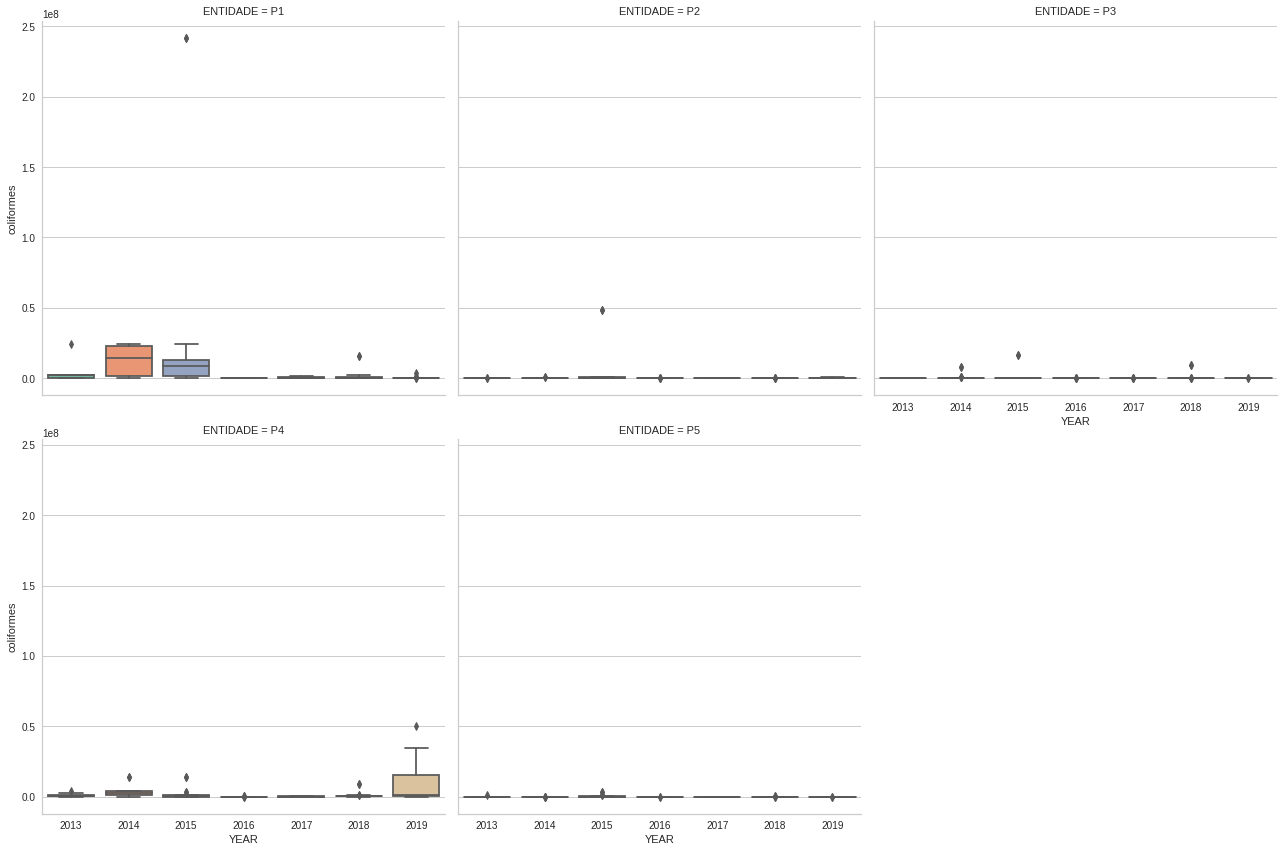

In [32]:
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True);
g = g.map(sns.boxplot, "YEAR", name, palette="Set2")

In [14]:
df.drop(columns=["YEAR"], inplace=True)
df.to_csv(f"./Normalized/{name}.csv", encoding='utf8', index=False)
# copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")